# Caso Educación ICESI

Un grupo de directores de programa junto a la coordinación de permanencia y graduación estudiantil, el CREA y el departamento de matemáticas, se unieron para investigar cómo una propuesta de estructura para reflexión docente y acompañamiento en pedagogía puede impactar en el aprendizaje de los estudiantes. Reflexión docente, como su nombre lo indica, consiste en una revisión exhaustiva sobre el sentido, la finalidad y el proceso en el que se desarrolla un curso. Es decir, a grandes rasgos se reflexiona sobre los objetivos de aprendizaje (la utilidad práctica de los saberes) y las actividades y el sistema de evaluación que permiten alcanzarlos. Sin duda, esto implica más horas de dedicación para los profesores (que en su mayoría son hora-cátedra), por tanto, un mayor costo para la universidad.

Adicionalmente, es difícil que un profesor tenga la capacidad para reflexionar sobre sus prácticas docentes, por lo que se requiere acompañamiento de expertos en pedagogía. Esto también implica mayores costos para la universidad. La pregunta central es: ¿vale la pena esta inversión en la estructura propuesta para reflexión docente en el departamento de matemáticas?

Para realizar el experimento se aprovechó el proceso de selección aleatorio de la matricula en primer semestre. Se trabajará con el curso de Álgebra y funciones, dejando por fuera del experimento a repitentes. Un total de 272 estudiantes nuevos fueron considerados en la muestra.

Una intervención (Intervención 1) consiste en acompañarlos desde la planeación de los objetivos del curso y las actividades, al igual que un acompañamiento semanal a lo largo de las 16 semanas de clase. Por su parte, el otro tipo de intervención (Intervención 2) no incluye el acompañamiento a lo largo del semestre (solo la planeación del curso y de las actividades). En ese orden de ideas, la intervención 1 es más costosa que la intervención 2, mientras que la metodología tradicional no representa un costo adicional.

Un profesor tuvo la intervención 1 y otro profesor la intervención 2 (cada uno dicta dos cursos) y a otros dos profesores se les pidió dictar sus cursos como tradicionalmente lo han hecho (cada uno dicta dos cursos). Los 4 profesores son hora cátedra y tienen un perfil similar.

En el archivo de Excel “Experimento.xlsx” se encuentra la base de datos del experimento que cuenta con las siguientes columnas:

    •	Género
    •	Facultad
    •	Estrato
    •	PUNT_MAT: Puntaje de matemáticas en las pruebas Saber 11 (0-100).
    •	PUNT_GLOB: Puntaje global en las pruebas Saber 11 (0-500).
    •	NOTA_DEF: La nota definitiva en el curso. (0-5) 
    
    •	GRUPO: Identifica si el estudiante pertenece a algún grupo de la intervención 1 (Grupo 1), a algún grupo de la intervención 2 (Grupo 2) o algún grupo de los dos profesores con la metodología tradicional.
    
Ustedes han sido comisionados por el rector para analizar los datos y entregar información relevante que permita tomar la decisión más adecuada. 

1.	Realice una completa descripción de todas las variables de la muestra. 

    a.	Definir qué tipo de variable es cada una.
    
    b.	Utilizar las herramientas adecuadas para describir cada una de las variables (recuerde: muestre tabla de frecuencia o estadísticas descriptivas, gráfica y análisis)

2.	Explore gráficamente la posible relación entre la intervención y las notas definitivas. Se espera un corto análisis de lo que encuentra exploratoriamente.

3.	Usando pruebas estadísticas, ¿qué puede concluir? ¿Vale la pena la inversión en una metodología de reflexión docente? Tiene pronto una reunión con el rector, ¿qué le recomienda: intervención 1, intervención 2 o seguir de la forma tradicional?. Se requiere que se planteen las hipótesis en todas las pruebas estadísticas que se realicen y se discuta el resultado de la prueba. 


In [1]:
# Procedemos a importar las librerias necesarias
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones

from scipy.stats import skew, kurtosis # coeficiente de adimetria, coeficiente kurtosis
from scipy.stats import shapiro ## Prueba normalidad Shapiro-Wilks

from scipy.stats import levene ## Prueba homogeneidad de varianzas Levene
from scipy.stats import f_oneway ## Prueba ANOVA de una vía
import pingouin as pg ## LIbrería funciones estadísticas


In [2]:
# Cargamos los datos.

data = pd.read_excel('Experimento.xlsx')
data

,Unnamed: 0,Género,Facultad,Estrato,PUNT_MAT,PUNT_GLOB,NOTA_DEF,GRUPO
0,1,M,FCN,2,63,324,2.35,Tradicional
1,2,M,FING,1,67,353,3.09,Tradicional
2,3,M,FCN,2,52,306,2.68,Tradicional
3,4,M,FING,4,58,277,2.77,Tradicional
4,5,F,FCAE,3,72,372,3.79,Tradicional
...,...,...,...,...,...,...,...,...
267,268,M,FING,1,66,337,3.41,Grupo2
268,269,F,FCN,2,79,381,3.89,Grupo2
269,270,F,FCN,6,80,362,3.89,Grupo2
270,271,M,FING,3,79,389,2.74,Grupo2


In [3]:
# Obtengo la información del tipo de variable por columna.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  272 non-null    int64  
 1   Género      272 non-null    object 
 2   Facultad    272 non-null    object 
 3   Estrato     272 non-null    int64  
 4   PUNT_MAT    272 non-null    int64  
 5   PUNT_GLOB   272 non-null    int64  
 6   NOTA_DEF    272 non-null    float64
 7   GRUPO       272 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 17.1+ KB


Para dar respuesta al punto 1, procedemos a determinar los verdaderos tipos de variables(cuantitativas/cualitativas)

In [4]:
datos = {'Columna_Variable': ['Genero','Facultad','Estrato','PUNT_MAT','PUNT_GLOB','NOTA_DEF','GRUPO'],
        'Tipo de variable': ['Cualitativa Nominal','Cualitativa Nominal', 'Cualitativa Ordinal',
                            'Cuantitativa Discreta','Cuantitativa Discreta','Cuantitativa Continua',
                            'Cualitativa Nominal ']}

df = pd.DataFrame(datos)

df

,Columna_Variable,Tipo de variable
0,Genero,Cualitativa Nominal
1,Facultad,Cualitativa Nominal
2,Estrato,Cualitativa Ordinal
3,PUNT_MAT,Cuantitativa Discreta
4,PUNT_GLOB,Cuantitativa Discreta
5,NOTA_DEF,Cuantitativa Continua
6,GRUPO,Cualitativa Nominal


In [5]:
# ahora procedemos a fijar el orden en las variables ordinales, para continuar con el analisis de cada
#columna
 
data['Estrato'] = pd.Categorical(data['Estrato'],
                                categories=[1,2,3,4,5,6],
                                ordered=True)

data

,Unnamed: 0,Género,Facultad,Estrato,PUNT_MAT,PUNT_GLOB,NOTA_DEF,GRUPO
0,1,M,FCN,2,63,324,2.35,Tradicional
1,2,M,FING,1,67,353,3.09,Tradicional
2,3,M,FCN,2,52,306,2.68,Tradicional
3,4,M,FING,4,58,277,2.77,Tradicional
4,5,F,FCAE,3,72,372,3.79,Tradicional
...,...,...,...,...,...,...,...,...
267,268,M,FING,1,66,337,3.41,Grupo2
268,269,F,FCN,2,79,381,3.89,Grupo2
269,270,F,FCN,6,80,362,3.89,Grupo2
270,271,M,FING,3,79,389,2.74,Grupo2


Procedemos a realizar las respectivas descripciones para cada variable, emplearemos las siguientes funciones para llevar a cabo los distintos análisis de cada variable:


In [6]:
"""
Esta función devuelve una tabla con un analisis descriptivo completo de la columna suministrada
Args:
    columnas (variable cuantitativa)
    
"""
def tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean() # Coeficiente variación
    tabla_descriptivas.loc['skew']=skew(columnas) # coeficiente de asimetria
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas) # coeficiente de curtosis.
    return tabla_descriptivas


## Función para construir tablas de frecuencias
def tabla_freq(columna):
    x=pd.crosstab(index=columna,columns="count").reset_index()
    x=x.rename(columns={'count':'Frec. Abs.'})
    y=pd.crosstab(index=columna,columns="count", normalize='columns').reset_index()
    y=y.rename(columns={'count':'Frec. Rel.'})
    tabla=x.merge(y,how='left')
    tabla.rename_axis(None, axis=1)
    return tabla

Ahora, procedemos a analizar los datos para cada variable.

Columna 'Género'

In [7]:
tabla_genero = tabla_freq(data['Género'])
tabla_genero

col_0,Género,Frec. Abs.,Frec. Rel.
0,F,152,0.558824
1,M,120,0.441176


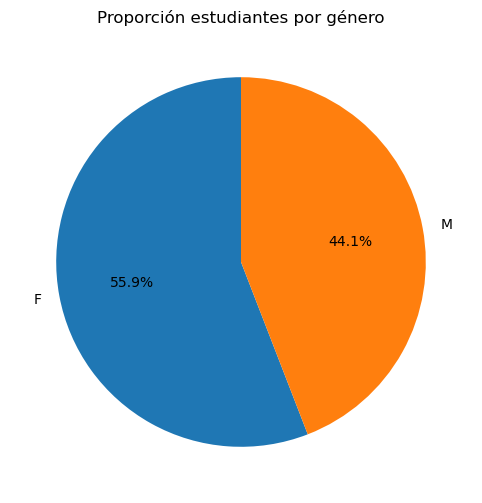

In [8]:
plt.figure(figsize=(8,6)) 
plt.pie(tabla_genero["Frec. Rel."], labels=tabla_genero["Género"],autopct='%1.1f%%',startangle=90)
plt.title("Proporción estudiantes por género")
plt.show()

**Conclusión:** Partiendo de la muestra, es posible afirmar que hay una mayor presencia de estudiantes  mujeres en el primer semestre de la universidad ICESI.

Para variable 'Facultad'

In [9]:
tabla_facu = tabla_freq(data['Facultad'])
tabla_facu

col_0,Facultad,Frec. Abs.,Frec. Rel.
0,FCAE,128,0.470588
1,FCN,54,0.198529
2,FING,90,0.330882


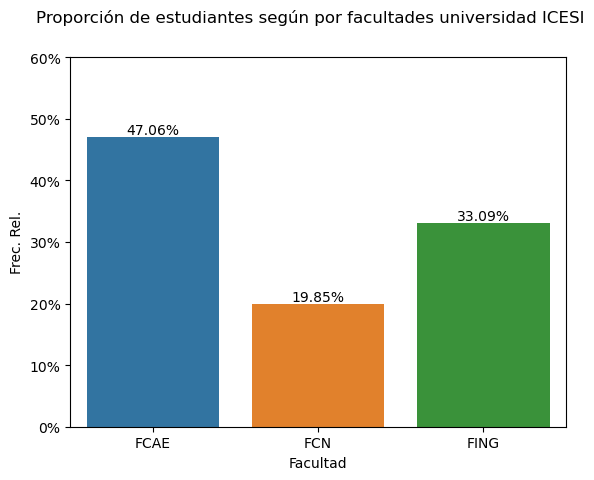

In [10]:
# Titulo general
plt.suptitle('Proporción de estudiantes según por facultades universidad ICESI')

# datos grafico de barras
frec_aprob=sns.barplot(x=tabla_facu['Facultad'],y=tabla_facu["Frec. Rel."]*100)
frec_aprob.bar_label(frec_aprob.containers[0], label_type='edge',fmt='%.2f%%') # visualizar porcentajes por barra
frec_aprob.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) # Visualizar eje y en mi escala porcentajes
frec_aprob.set(ylim=(0, 60))

plt.show() 

**Conclusión:** Del analísis de la muestra, es posible afirmar que, por cada 4 estudiantes entrevistados, almenos 2 pertenecen a la facultad FCAE.

Para la variable 'Estrato'

In [11]:
tabla_estrato = tabla_freq(data['Estrato'])
tabla_estrato

col_0,Estrato,Frec. Abs.,Frec. Rel.
0,1,58,0.213235
1,2,91,0.334559
2,3,42,0.154412
3,4,29,0.106618
4,5,28,0.102941
5,6,24,0.088235


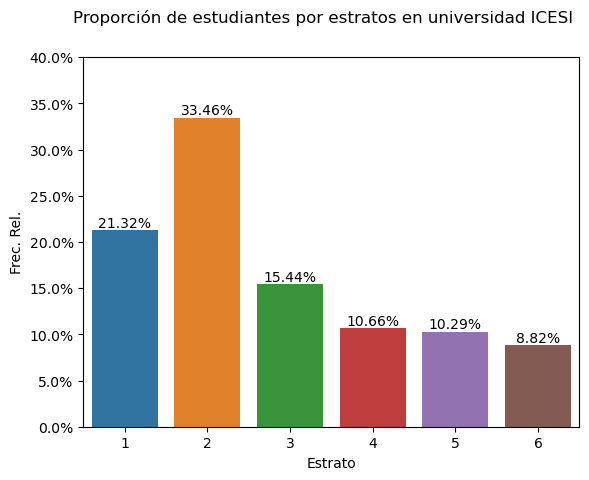

In [12]:
# Titulo general
plt.suptitle('Proporción de estudiantes por estratos en universidad ICESI')

# datos grafico de barras
frec_estrato=sns.barplot(x=tabla_estrato['Estrato'],y=tabla_estrato["Frec. Rel."]*100)
frec_estrato.bar_label(frec_estrato.containers[0], label_type='edge',fmt='%.2f%%') # visualizar porcentajes por barra
frec_estrato.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) # Visualizar eje y en mi escala porcentajes
frec_estrato.set(ylim=(0, 40))

plt.show() 

**Conclusión:** De los datos obtenidos y visualizados, se puede afirmar que por cada 10 estudiantes entrevistados, almenos 6 estudiantes pertenecen a estratos bajos(1,2 y 3), reflejando asi que la proporcion estudiantil es mayor en los estudiantes de estos estratos.

Variable 'PUNT_MAT', cuantitativa discreta:

In [13]:
tabla_mat = tabla_descriptivas(data['PUNT_MAT'])
tabla_mat

,PUNT_MAT
count,272.000000
mean,68.808824
std,10.006282
min,39.000000
25%,62.000000
50%,69.000000
75%,76.000000
max,95.000000
coef. variation,0.145421
skew,-0.232233


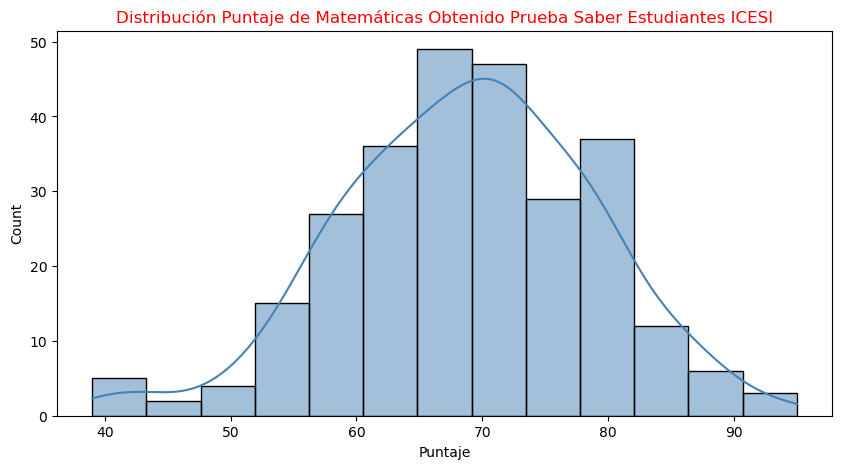

In [14]:
plt.figure(figsize=(10,5)) 
hist_mat=sns.histplot(x=data['PUNT_MAT'],kde=True,color="steelblue") ## crea el histograma
hist_mat.set_xlabel('Puntaje') ## cambia el título del eje x
# hist_G3.set_xlim(0, 22)                     ## cambia los límites del eje x
# hist_G3.set_xticks(range(0,22,2))             ## cambia los valores del eje x
hist_mat.set_title('Distribución Puntaje de Matemáticas Obtenido Prueba Saber Estudiantes ICESI', color='r')
plt.show()

**Conclusión:** El centro de la distribución se encuentra en 69 puntos, con el 50% de los datos agrupados alrededor de este centro entre 62 y 76 puntos. De acuerdo a la escala propuesta por vargas(2007) la dispersión es baja(14%). Finalmente, es posible afirmar que la distribución es relativamente simétrica(leve sesgo hacia la izquierda) y semejante a una distribución normal.

Analisis variable 'PUNT_GLOB', cuantitativa discreta:

In [15]:
tabla_glob = tabla_descriptivas(data['PUNT_GLOB'])
tabla_glob

,PUNT_GLOB
count,272.000000
mean,339.264706
std,35.383140
min,219.000000
25%,316.750000
50%,341.000000
75%,362.000000
max,423.000000
coef. variation,0.104294
skew,-0.339606


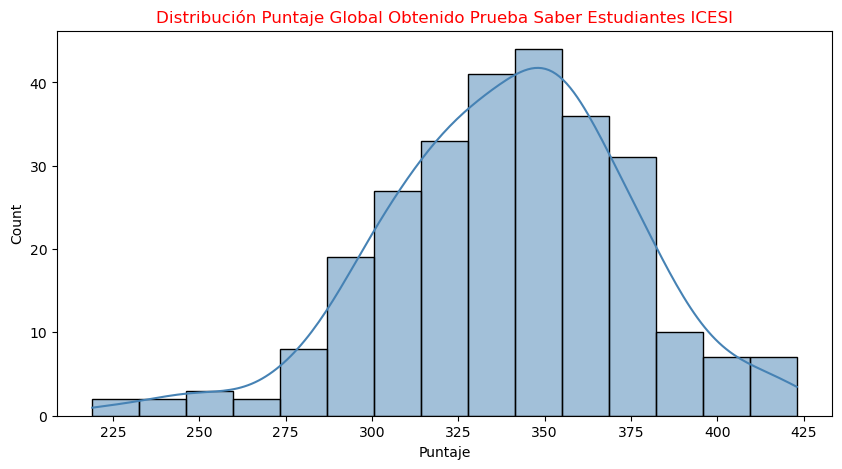

In [16]:
plt.figure(figsize=(10,5)) 
hist_global=sns.histplot(x=data['PUNT_GLOB'],kde=True,color="steelblue") ## crea el histograma
hist_global.set_xlabel('Puntaje') ## cambia el título del eje x
# hist_G3.set_xlim(0, 22)                     ## cambia los límites del eje x
# hist_G3.set_xticks(range(0,22,2))             ## cambia los valores del eje x
hist_global.set_title('Distribución Puntaje Global Obtenido Prueba Saber Estudiantes ICESI', color='r')
plt.show()

**Conclusión:** Centro de distribución esta ubicado en 341 puntos, con el 50% de los datos agrupados alrededor de este centro entre 316 y 362 puntos. Presenta un CV del 10% reflejando asi la dispersion baja de los datos(según escala de vargas(2007)). Es posible afirmar que la distribución presenta una ligera asimetría negativa( leve sesgo hacia la izquierda), presenta un leve pico debido a la concentración de datos alrrededor de la media.

Para la columna de la variable 'NOTA_DEF', cuantitativa continua:

In [17]:
tabla_def = tabla_descriptivas(data['NOTA_DEF'])
tabla_def

,NOTA_DEF
count,272.000000
mean,3.415846
std,0.511079
min,2.290000
25%,3.090000
50%,3.440000
75%,3.812500
max,4.780000
coef. variation,0.149620
skew,-0.130085


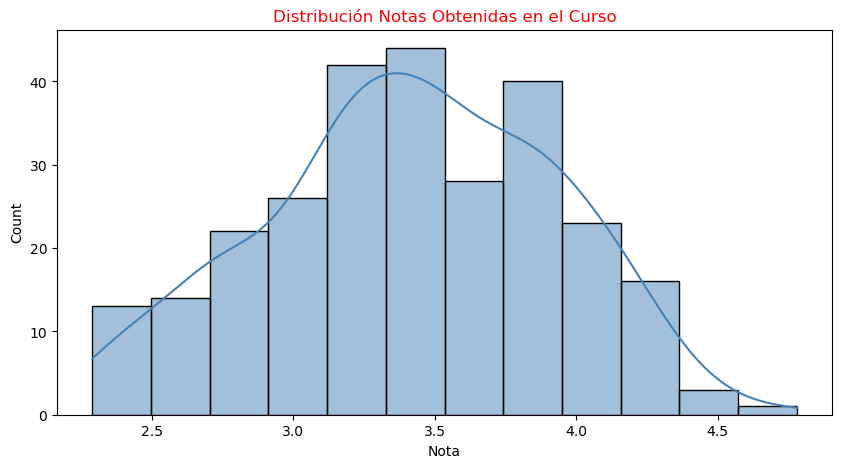

In [18]:
plt.figure(figsize=(10,5)) 
hist_def=sns.histplot(x=data['NOTA_DEF'],kde=True,color="steelblue") ## crea el histograma
hist_def.set_xlabel('Nota') ## cambia el título del eje x
# hist_G3.set_xlim(0, 22)                     ## cambia los límites del eje x
# hist_G3.set_xticks(range(0,22,2))             ## cambia los valores del eje x
hist_def.set_title('Distribución Notas Obtenidas en el Curso', color='r')
plt.show()

**Conclusión:** Se evidencia que en el centro de distribución, las notas obtenidas en el curso fueron de 3.44 para el 50% de los datos agrupados, alrededor del centro de este mismo, se aprecia que la mayor cantidad de datos se agrupan entre 3.09 y 3.81. Los datos presentan una dispersión baja(de acuerdo a la escala propuesta por Vargas(2007)). Finalmente, es posible afirmar que la distribución es ligeramente asimetrica(leve sesgo hacia la izquierda) y achatada( colas cortas y pocos datos en los extremos).

In [19]:
tabla_grupo = tabla_freq(data['GRUPO'])
tabla_grupo

col_0,GRUPO,Frec. Abs.,Frec. Rel.
0,Grupo1,71,0.261029
1,Grupo2,69,0.253676
2,Tradicional,132,0.485294


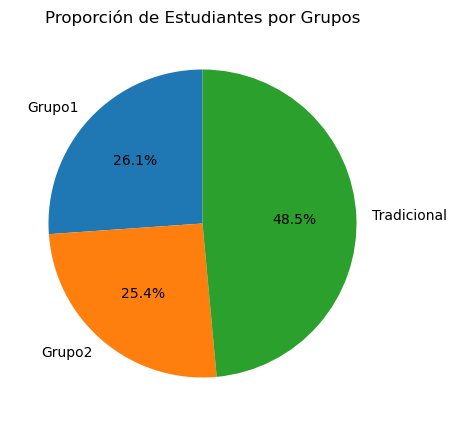

In [20]:
plt.figure(figsize=(10,5)) 
plt.pie(tabla_grupo["Frec. Rel."], labels=tabla_grupo["GRUPO"],autopct='%1.1f%%',startangle=90)
plt.title("Proporción de Estudiantes por Grupos")
plt.show()

**Conclusión:** Por cada 4 estudiantes entrevistados, almenos 2 pertenecen a los grupos de educación tradicional. Esto refleja que la mayor cantidad de poblacion estudiantil recibe este metodo de educación.

Para el interrogante 2, procedemos a realizar la exploración entre la intervención(Variable 'GRUPO' - Cualitativa) y las notas definitivas(Variable 'NOTA_DEF'- Cuantitativa), se tiene:

In [21]:
intervencion_notas = data.groupby('GRUPO')['NOTA_DEF'].describe()
intervencion_notas

,count,mean,std,min,25%,50%,75%,max
GRUPO,,,,,,,,
Grupo1,71.0,3.549859,0.500210,2.35,3.260,3.610,3.875,4.52
Grupo2,69.0,3.499565,0.500257,2.29,3.210,3.510,3.870,4.78
Tradicional,132.0,3.300000,0.499797,2.30,2.955,3.265,3.755,4.36


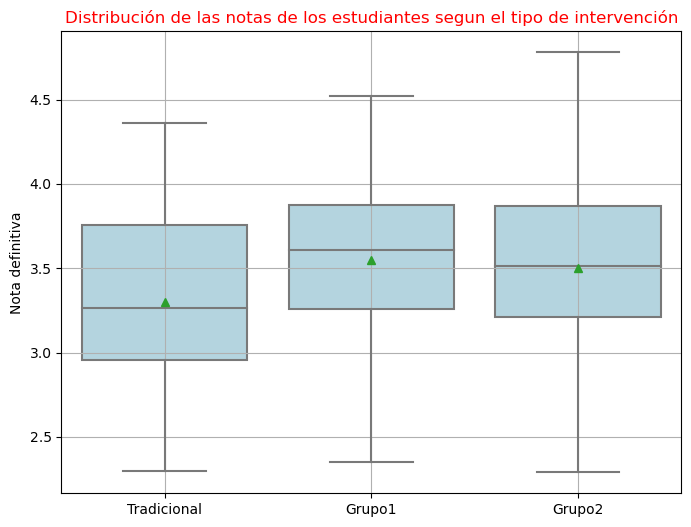

In [22]:
plt.figure(figsize=(8,6)) 
boxplot_inter_nota=sns.boxplot(x=data['GRUPO'],y=data['NOTA_DEF'],color="lightblue",showmeans=True) ## crea el boxplot
boxplot_inter_nota.set_xlabel('') ## cambia el título del eje x
boxplot_inter_nota.set_ylabel('Nota definitiva') ## cambia el título del eje y
boxplot_inter_nota.set_title('Distribución de las notas de los estudiantes segun el tipo de intervención', color='r')
plt.grid()
plt.show()  

**Conclusión:** De la exploración grafica, se puede afirmar que según el tipo de intervención,Grupo1 y Grupo2, las notas definitivas obtenidas van a presentar unos resultados positivos evidenciados en sus respectivas medias en comparacion con la metodología Tradicional.
* Grupo1: 3.55
* Grupo2: 3.5
* Tradicional: 3.3

Asi mismo, el Grupo1 en comparación del Grupo 2, la diferencia es leve, sus notas no divergen de manera notoria.


Procedemos a realizar las distintas pruebas estadisticas para validar lo anterior y poder dar respuesta al punto 3.

In [23]:
# Validación de los supuestos
## Normalidad

print("Población: Tradicional")
Estad,vp = shapiro(data[data["GRUPO"]=="Tradicional"]["NOTA_DEF"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')
print("Población: Grupo1")
Estad,vp = shapiro(data[data["GRUPO"]=="Grupo1"]["NOTA_DEF"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')
print("Población: Grupo2")
Estad,vp = shapiro(data[data["GRUPO"]=="Grupo2"]["NOTA_DEF"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')

Población: Tradicional
Estadístico SW= 0.9811262488365173, Valor-p= 0.06354282051324844
Población: Grupo1
Estadístico SW= 0.9728129506111145, Valor-p= 0.12597548961639404
Población: Grupo2
Estadístico SW= 0.9880001544952393, Valor-p= 0.7529125809669495


In [24]:
# Homogeneidad de varianzas

Estad,vp=levene(data[data["GRUPO"]=="Tradicional"]["NOTA_DEF"],
               data[data["GRUPO"]=="Grupo1"]["NOTA_DEF"],
               data[data["GRUPO"]=="Grupo2"]["NOTA_DEF"],
               center='mean')
print(f'Estadístico W= {Estad}, Valor-p= {vp}')

Estadístico W= 0.20888940467847075, Valor-p= 0.8116164835091431


Se cumplen ambos supuestos. Por tanto, podemos hacer la prueba ANOVA. Recordemos las hipótesis:
- Ho: la media en todas las poblaciones es igual
- Ha: la media de al menos una población es diferente

In [25]:
# Prueba ANOVA (libreria stats)

Estad,vp=f_oneway(data[data["GRUPO"]=="Tradicional"]["NOTA_DEF"],
               data[data["GRUPO"]=="Grupo1"]["NOTA_DEF"],
               data[data["GRUPO"]=="Grupo2"]["NOTA_DEF"])
print(f'Estadístico F= {Estad}, Valor-p= {vp}')

Estadístico F= 7.059853566705065, Valor-p= 0.0010273138866285362


**Conclusión:** Del 'Valor-p', rechazo la hipótesis nula; con un 95% de confianza (incluso 99%) podemos afirmar que al menos una de las medias es diferente. Pero entonces, ¿cuáles son diferentes?

In [26]:
# PRUEBA HSD TUKEY:

pg.pairwise_tukey(data=data, dv='NOTA_DEF', between='GRUPO')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Grupo1,Grupo2,3.549859,3.499565,0.050294,0.084528,0.595000,0.822919,0.099994
1,Grupo1,Tradicional,3.549859,3.300000,0.249859,0.073590,3.395278,0.002270,0.497910
2,Grupo2,Tradicional,3.499565,3.300000,0.199565,0.074280,2.686645,0.020872,0.397661


**Conclusión:** Del valor "p-tukey", con un 95%(Incluso 99%) podemos afirmar que existe diferencia en la nota definitiva del curso entre las intervenciones Grupo1 y Tradicional y, Grupo2 y Tradicional, pero no entre Grupo1 y Grupo2.

Con los análisis realizados anteriormente y resaltando la siguiente información:
- Intervención-Grupo1: Presenta el costo mas alto.
- Intervención-Grupo2: Menor costo en comparación con Intervención-Grupo1.
- Metodología Tradicional: No representa un costo adicional.

De lo anterior, la mejor recomendación para el rector es invertir en la metodología de reflexión docente(Grupo1 y Grupo2) porque se obtienen mejores resultados reflejados en las notas definitivas en comparación con la metodología tradicional, en cuestión de costos. Apreciando que no existe **"diferencia"** en la nota definitiva del Grupo1 y Grupo2, pero si en los costos que presentan cada intervención, la mejor **RECOMENDACIÓN** seria implementar la intervención probada en el **Grupo2**.